In [91]:
#import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
sns.set()

In [92]:
#read in dataset into pandas
df = pd.read_csv('housesalesprediction/kc_house_data.csv')

In [93]:
#inspect how many rows and columns are in datasest
df.shape

(21613, 21)

In [94]:
#view first couple rows to make sure columns and rows are labelled properly
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [95]:
#take a look at the different data types of the values in the columns
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [96]:
#take a look at the names of all the columns
print(df.columns)
columns_list = df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [97]:
#take a look at zip code column and sort out unique values to see if data is sufficient for all of king county predictions
all_zip_codes = df['zipcode']
zip_codes = df['zipcode'].unique()
np.sort(zip_codes)
len(zip_codes)

70

#### With 108 zip codes in the total King County area and 70 provided in this dataset, we can conclude that this dataset is a good representation of the King County area price of homes.

In [98]:
#pick a couple features and see if there are any trends to know which features to use in exploratory data analysis
subset = df[['price','bedrooms','bathrooms','sqft_living']]
subset.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [124]:
#check if row labels correspond to index labels on this data set
df.iloc[[0,1500]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1500,4324200060,20150312T000000,249000.0,3,1.5,1700,8247,1.0,0,0,...,7,1010,690,1970,0,98031,47.4216,-122.174,1440,8400


In [100]:
#filter the highest grade according to king county.gov/assesor buiding grade and compare against price
df.loc[df['grade'] == 13, ['grade', 'price']]

,grade,price
4411,13,5570000.0
4811,13,2479000.0
5451,13,1780000.0
6041,13,2385000.0
7035,13,3800000.0
7252,13,7700000.0
7907,13,3200000.0
9254,13,6885000.0
10373,13,2983000.0
13411,13,2415000.0


In [101]:
#subset the highest buiding rating and condition rating in accordance to king county.gov/assessor
df.loc[(df['grade'] == 13) & (df['condition'] > 3), ['grade', 'condition', 'price']]

,grade,condition,price
7035,13,4,3800000.0
7252,13,4,7700000.0


In [102]:
#check to see if any missing values in dataset
df.isnull().sum()
df.isnull().sum().sum()

0

### After doing data exploration decide if it is statistically important to add city names to zip code data.

In [103]:
# take a look at correlations of price vs different features to see which one is showing highest correlation
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### So far, square footage ,building grade and number of bathrooms tops the price-correlation list but other statistical methods might be needed if we decide to look at zipcodes since zipcodes are categorical. The correlation table allows us to see how the top 5 features are so much more correlated than all the rest of the features combined.¶

(array([1.0000e+00, 3.0000e+00, 2.9000e+01, 2.4200e+02, 2.0380e+03,
        1.5049e+04, 2.6150e+03, 1.1340e+03, 3.9900e+02, 1.0300e+02]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

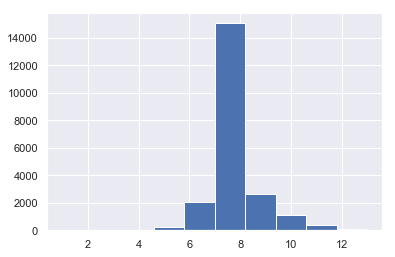

In [104]:
#since grade has a high correlation with price, take a look at how grade data points are distributed on a histogram
plt.hist(df['grade'])

### In our correlation stats, building grade was one of the highest correlation features with price and the building grade histogram above indicates that the majority of King County real estate falls around a 7.5 building grade.

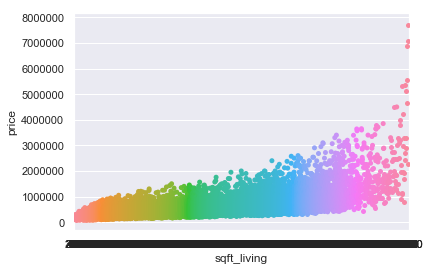

In [105]:
#take a look at a beeswarm plot for the highest correlated feature of sqft_living to look for any trends
_ = sns.swarmplot(x='sqft_living', y='price', data=df)

### The beeswarm plot shows a marked correlation between square foot living area and home price, which is certainly what we would expect based on earlier correlation stats.  

In [106]:
#utilizing numpy mean, find means of different features
#create variable for no of bathrooms to do further data visualizations
no_of_bathrooms = df[['bathrooms']]
no_of_bedrooms = df[['bedrooms']]
no_of_floors = df[['floors']]
building_grade = df[['grade']]
mean_no_bedrms = np.mean(no_of_bedrooms)
mean_no_bathrms = np.mean(no_of_bathrooms)
mean_no_floors = np.mean(no_of_floors)
mean_building_grade = np.mean(building_grade)
print('mean no of ', mean_no_bedrms)
print('mean no of ', mean_no_bathrms)
print('mean no of ', mean_no_floors)
print('mean building ', mean_building_grade)

mean no of  bedrooms    3.370842
dtype: float64
mean no of  bathrooms    2.114757
dtype: float64
mean no of  floors    1.494309
dtype: float64
mean building  grade    7.656873
dtype: float64


### Performing numpy stats shows us that the average number of bedrooms is approx 3, the average number of bathrooms is 2 , the average number of floors is 1.5 and the average building grade is approx 7.5.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2a68c7828>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a68fd860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2a68c7208>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2a68fdfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2a7b9fa90>],
 'means': [<matplotlib.lines.Line2D at 0x1a2a68fd400>]}

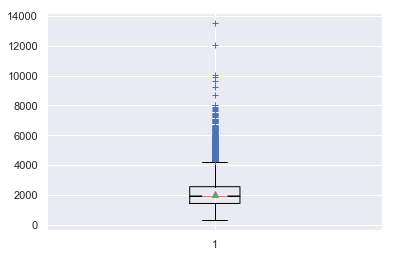

In [19]:
#take a look at how median for square foot living falls on a box and whisker plot.
plt.boxplot(df['sqft_living'],1, showmeans = True, sym = 'b+')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2ac300f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2ac3026d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2ac300b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2ac302dd8>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1a2ac302ef0>]}

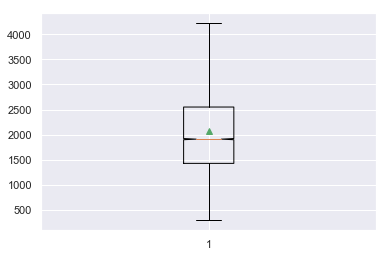

In [107]:
#compare that to the box and whisker plot without the outliers
plt.boxplot(df['sqft_living'],1, showmeans = True, sym = '')

In [108]:
print('mean square footage is:', np.mean(df['sqft_living']))

mean square footage is: 2079.8997362698374


### Since the boxplot without outliers looks the same as with outliers, we can conclude that the data is well distributed and that the median square foot living area is around 2000 square feet.

In [109]:
#compute percentiles for the prices of homes
home_mean = np.mean(df['price'])
print('mean home price is:', home_mean)
percentiles = np.array([2.5, 25, 50, 75, 97.5])
prices_homes = df[['price']]
homes_percent = np.percentile(prices_homes,percentiles)
print(homes_percent)

mean home price is: 540088.1417665294
[ 185000.  321950.  450000.  645000. 1485000.]


{'whiskers': [<matplotlib.lines.Line2D at 0x1f4a17df160>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4a18147f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4a1808cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4a1814ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4a181d630>],
 'means': [<matplotlib.lines.Line2D at 0x1f4a1814eb8>]}

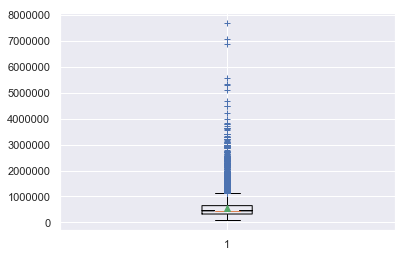

In [58]:
#create box and whisker plot of home prices to see how that compares to percentiles
plt.boxplot(df['price'],1, showmeans = True, sym = 'b+')

### Based on the percentile assessment, the majority of homes fall within the 450,000 dollar price range which differs from the mean of 540,088 seen on the box and whisker plot.  The plot, however, shows this may be due to some houses on the higher end of the dataset affecting the mean home price.

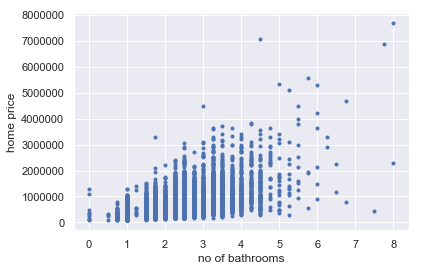

In [110]:
#Since the number of bathrooms was very highly correlated with price, 
#take a look at a scatterplot of no of bathrooms vs home price
_ = plt.plot(no_of_bathrooms, prices_homes, marker = '.', linestyle = 'none')
_ = plt.xlabel('no of bathrooms')
_ = plt.ylabel('home price')
plt.show()

### The scatterplot of bathrooms and price shows a definite correlation between price and the number of bathrooms. However, what's interesting is that after 3.5 bathrooms there are many data points within 4-5 bathrooms that are at the same price of  3.5 bathrooms so it appears the price levels off a bit after 3.5 bathrooms.

In [111]:
'''
Since histograms suffer from thinning bias, take a look next at the cumulative distribution function
in order to further analyze the distribution of the data.
'''
def ecdf(data):
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data) + 1)/ len(data)
    return xaxis, yaxis

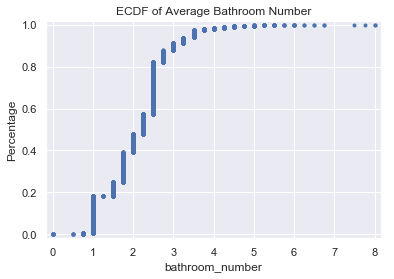

In [112]:
#compute ecdf for the number of bathrooms
import statsmodels as sm
import sklearn as sl
import scipy.special
import scipy as sp
from scipy import stats

x_bath, y_bath = ecdf(df['bathrooms'])
_ = plt.plot(x_bath, y_bath, marker = '.', linestyle = 'none')
_ = plt.title('ECDF of Average Bathroom Number')
_ = plt.xlabel('bathroom_number')
_ = plt.ylabel('Percentage')
_ = plt.margins(0.02)
plt.show()

### The cumulative distribution function shows that the 50% probability of number of bathrooms falls between 2 and 2.25 which makes sense since the calculated mean number of bathrooms in our dataset was 2.

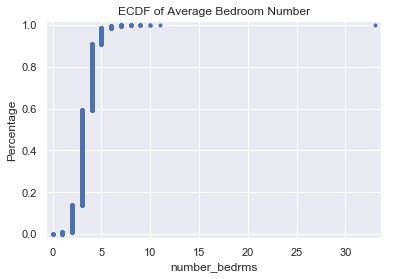

In [113]:
#create more variables to plot more ECDF visualizations(no of bedrooms, no of floors)
x_bed, y_bed = ecdf(df['bedrooms'])
_ = plt.plot(x_bed, y_bed, marker = '.', linestyle = 'none')
_ = plt.title('ECDF of Average Bedroom Number')
_ = plt.xlabel('number_bedrms')
_ = plt.ylabel('Percentage')
_ = plt.margins(0.02)
plt.show()

### In this ecdf visualization for the number of bedrooms, the 50% probability is seen around 3 which also makes sense since it corresponds to our mean number of 3 bedrooms.

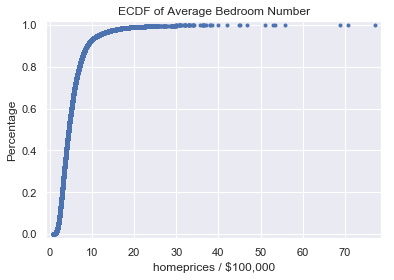

In [114]:
#plot the percentiles of home prices on the ECDF plot 
x_pr, y_pr = ecdf(df['price'] * .00001)
_ = plt.plot(x_pr, y_pr, '.')
_ = plt.xlabel('homeprices / $100,000')
_ = plt.ylabel('Percentage')
_ = plt.title('ECDF of Average Bedroom Number')
_ = plt.margins(0.02)
plt.show()

### Plotting the home price with the ecdf shows us the 50% probability of home prices falls around 500,000 which also matches our calculated mean home price of 540,088 dollars.  The ecdf visualizations also confirm that our data falls within a normal distribution for the most part however we will need to investigate further with hypothesis testing to decide if the higher priced homes are outliers and need to be removed.

## Frequentist/Bootstrap Hypothesis Testing:
### null hypoth: diff of means between full data sample and bootstrap random data sample = 0
### alt hypoth: diff of means between full data sample and bootstrap random data sample != 0

In [115]:
#In the previous visualizations we determined our data was normally distributed(eg.take a look at histogram for building grade)
#since our sample size > 30, we can also determine the observations are independent
#therefore begin with bootstrap testing to compare our previous numpy mean(7.66) of building grade with bootstrap testing mean
bs_sample = np.random.choice(df['grade'], size = 100)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (100)**.5
bs_zsre = (bs_mean -7.66) / bs_zse
print(bs_mean,bs_std,bs_zse)
print("z_score is: ", bs_zsre)

7.57 1.1068423555321687 0.11068423555321687
z_score is:  -0.8131239245604036


### The z score above corresponds to a p value of .114 which is greater than .05, therefore we fail to reject the hypothesis and conclude that there is no statistical difference between the difference of the means even when a random bootstrap sample set is chosen and compared against the actual data set.

## In our data exploration and visualization, we determined that the mean home price was 540,088 dollars, the mean no of bathrooms was 2  and the mean no of bedrooms was 3.  We will statistically compare the difference of means between the mean house price having mean number(two) of bathrooms against mean home price having mean number(three) of bedrooms.

### Null hypoth: The difference of means of home price with 3 bedrooms and 2 bathrooms = 0  

### Alt hypoth: The difference of means of home price with 3 bedrooms and 2 bathrooms != 0

In [116]:
#create a for loop to only look at home prices with 3 bedrooms
booleans = []
for size in df.bedrooms:
    if size == 3:
        booleans.append(True)
    else:
        booleans.append(False)

In [125]:
#take a look at boolean series
print(booleans[0:5])
is_ave = pd.Series(booleans)
three_rms = df[is_ave]
print(len(three_rms), 'is number of three bedrm homes')
three_rms_price = three_rms['price']

[True, True, False, False, True]
9824 is number of three bedrm homes


In [118]:
#evaluate mean of home prices with 3 bedrooms
print("three bedrm mean home price is:", np.mean(three_rms_price))

three bedrm mean home price is: 466232.07848127035


In [119]:
#create boolean series for home prices that have 2 bathrooms
is_ave_bath = df.bathrooms == 2
is_ave_bath.head()

0    False
1    False
2    False
3    False
4     True
Name: bathrooms, dtype: bool

In [126]:
#calculate mean of home prices with 2 bathrooms
two_bath = df[is_ave_bath]
two_bath_price = two_bath['price']
print(len(two_bath), 'is no of 2 bathrm homes')
print("two bathrm mean home price is:", np.mean(two_bath_price))

1930 is no of 2 bathrm homes
two bathrm mean home price is: 457889.7186528497


In [88]:
#find middle indices in order to determine median of dataset
all_home_prices = df['price']
all_sorted_prices = np.sort(all_home_prices)
print(len(all_sorted_prices)/2)

10806.5


In [56]:
#print median home price to compare against mean home price
home_med = all_sorted_prices[10806]
print('median home price is:', home_med)

median home price is: 450000.0


### These findings suggest that the mean number of bedrooms(3) is associated with a mean home price of 466232 dollars and the mean number of bathrooms(2) is associated with a mean home price of 457890 dollars.  Although the 3 bedroom mean home price is more closely aligned with the overall mean home price of 540,088 dollars, the 2 bathroom mean home price is more closely aligned with the median home price of 450,000 dollars. This discrepancy may be due to the fact that there is a larger sample size(9824) of 3 bedrooms than that of two bathrooms(1930) or may, more likely, be due to the fact that the mean home price of 540088 is being affected by  higher priced homes(such as one home priced at 7 million dollars). If we, instead, compare our stats against the median home price, then the two bathroom homes appear more correlated which makes sense since correlation testing indicated that the number of bathrooms is more correlated with home price than the number of bedrooms.

In [65]:
#compare the two bathroom mean home price with three bedroom mean home price using hypothesis testing
diff_of_means = np.mean(three_rms_price) - np.mean(two_bath_price)
print("the diff of means is:", diff_of_means)

the diff of means is: 8342.359828420624


In [38]:
#import stats package to determine p value and to recheck z score above.
from statsmodels.stats.weightstats import ztest
z, pval = ztest(three_rms_price,two_bath_price, alternative='two-sided')
print('z: {} , pval: {}'.format(z, pval))

z: 1.3187908819369583 , pval: 0.1872390333994377


### Based on a 95% confidence interval, a p-value of .18 indicates that we cannot conclude that a significant difference exists between the mean home price of two bathrooms and the mean home price of three bathrooms.
### This is exciting since it helps us in our home price prediction analysis.  Last we will compare the mean home price using bootstrapping method against the actual mean home price.  This will help us take a look at the mean home price given a random sample and also evaluate the validity of our data set.  

In [46]:
print(home_mean)
home_std = (np.std(df['price']))
print(home_std)
bs_sample = np.random.choice(df['price'], size = 2000)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (2000)**.5
bs_zsre = (bs_mean - 540088) / bs_zse
print(bs_mean,bs_std,bs_zse)
print("z_score is: ", bs_zsre)

540088.1417665294
367118.7031813722
538129.955 323137.534392622 7225.57492983579
z_score is:  -0.2709881246840161


### Based on the p-value of >.05, we can fail to reject the hypothesis that there is a statistical difference between  the mean of our bootstrap sample and the mean of our housing price data set.  

In [47]:
diffe_of_means = home_mean - bs_mean
twosamp_std = ((((bs_std)**2)/2000) + (((home_std)**2)/21613))**.5
m_of_err = 1.96 * (twosamp_std)
m_of_err

14984.045045496337

In [48]:
conf_int = (diffe_of_means + m_of_err), (diffe_of_means - m_of_err)
print(conf_int)

(16942.23181202579, -13025.858278966882)


### Within a margin of error of 14,984 dollars, we can be 95% certain that the confidence interval range above contains our true mean.  The high standard deviation however in both the bootstrap data set as well as the actual dataset is an indication that there is a large range and high degree of variability of some data points from the mean.  This might be due to the few houses that are on the higher end of the dataset.  This is an important finding from our hypothesis and statistical testing as it indicates that, as the dataset stands, the median is a more reliable measurement of central tendency.  It also indicates, that these outliers,or higher priced homes, may need to be removed from the dataset. However, before removing these values from the dataset, we will utilize the logarithmic function to see if that normalizes out the home prices and decreases the spread.  

In [49]:
#compute percentiles for the prices of homes but utilizing log to determine if we need to drop higher priced home from dataset
l_price = np.log(df['price'])
print(np.mean(l_price))
percentiles = np.array([2.5, 25, 50, 75, 97.5])
l_prices_homes = np.log(df[['price']])
l_homes_percent = np.percentile(l_prices_homes,percentiles)
print(l_homes_percent)

13.047816917155423
[12.1281111  12.68215153 13.01700286 13.3770056  14.21092533]


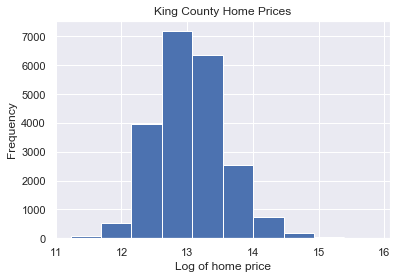

In [50]:
plt.hist(l_price)
plt.title("King County Home Prices")
plt.xlabel("Log of home price")
plt.ylabel("Frequency")
plt.show()

In [53]:
l_home_mean = np.mean(l_price)
print("mean is:", l_home_mean)
l_home_std = (np.std(l_price))
print("std is:", l_home_std)
l_bs_sample = np.random.choice(l_price, size = 2000)
l_bs_mean = np.mean(l_bs_sample)
l_bs_std = np.std(l_bs_sample)
l_bs_zse = l_bs_std / (2000)**.5
l_bs_zsre = (l_bs_mean - 13.05) / l_bs_zse
print('bootstrap mean is:', l_bs_mean)
print('bootstrap std is:', l_bs_std)
print('bootstrap zscore is:', l_bs_zse)
print("z_score is: ", l_bs_zsre)

mean is: 13.047816917155423
std is: 0.5266723344538438
bootstrap mean is: 13.033419403740886
bootstrap std is: 0.5247660938896633
bootstrap zscore is: 0.011734126582243242
z_score is:  -1.413023469868227


In [52]:
l_diff_of_means = l_home_mean - l_bs_mean
l_twosamp_std = ((((l_bs_std)**2)/2000) + (((l_home_std)**2)/21613))**.5
l_m_of_err = 1.96 * (l_twosamp_std)
print('margin of error is:', l_m_of_err)
l_conf_int = (l_diff_of_means + l_m_of_err), (l_diff_of_means - l_m_of_err)
print('confidence interval is:', l_conf_int)

margin of error is: 0.024121990514895594
confidence interval is: (0.038382288627230574, -0.009861692402560615)


In [57]:
l_two_bath_price = np.log(two_bath['price'])
print('mean is:', np.mean(l_two_bath_price))
l_three_rms_price = np.log(three_rms['price'])
print('mean is:', np.mean(l_three_rms_price))
print('median home price is:', np.log(home_med))

mean is: 12.945214978866858
mean is: 12.936713402637833
median home price is: 13.017002861746503


{'whiskers': [<matplotlib.lines.Line2D at 0x1f4a07b8dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4a17b9b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4a17b90b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4a17b9eb8>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1f4a17c2630>]}

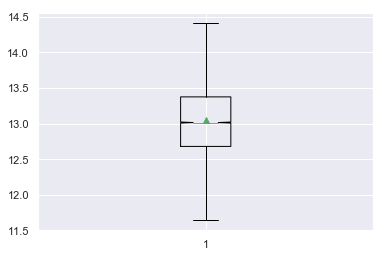

In [54]:
plt.boxplot(l_price, 1, showmeans = True, sym = '')

### The p-value of .07 indicates there is no statistical difference between our bootstrap sample mean and actual home price mean. Also, the central spread of the log function of price is much more normalized with a mean home price of 13.05 and a median home price of 13.02.  The box and whisker plot also indicates an even spread in home prices. In conclusion, we will not remove the higher priced homes from the dataset but instead utilize the logarithmic function on the price values.